In [16]:
import numpy as np

class AgglomerativeClustering:
    def __init__(self, n_clusters=3, linkage='single'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.labels_ = None

    def fit(self, X):
        # Initialize clusters with each data point as its own cluster
        clusters = [[i] for i in range(len(X))]
        # print("cluster shape ", len(clusters))

        # Compute pairwise distances between clusters based on linkage criteria
        while len(clusters) > self.n_clusters:
            distances = self.compute_distances(X, clusters)
            print(distances.shape)
            min_dist, min_indices = self.find_min_distance(distances)

            # Merge the closest clusters
            clusters = self.merge_clusters(clusters, min_indices)

        # Assign labels based on the final clusters
        self.labels_ = np.zeros(len(X), dtype=int)
        for label, cluster in enumerate(clusters):
            for i in cluster:
                self.labels_[i] = label

    def compute_distances(self, X, clusters):
        distances = np.zeros((len(clusters), len(clusters)))

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distances[i, j] = self.compute_cluster_distance(X, clusters[i], clusters[j])

        return distances

    def compute_cluster_distance(self, X, cluster1, cluster2):
        if self.linkage == 'single':
            return np.min([np.linalg.norm(X[i] - X[j]) for i in cluster1 for j in cluster2])
        elif self.linkage == 'complete':
            return np.max([np.linalg.norm(X[i] - X[j]) for i in cluster1 for j in cluster2])
        elif self.linkage == 'average':
            return np.mean([np.linalg.norm(X[i] - X[j]) for i in cluster1 for j in cluster2])

    def find_min_distance(self, distances):
        min_dist = np.inf
        min_indices = (0, 0)

        for i in range(len(distances)):
            for j in range(i + 1, len(distances)):
                if distances[i, j] < min_dist:
                    min_dist = distances[i, j]
                    min_indices = (i, j)

        return min_dist, min_indices

    def merge_clusters(self, clusters, indices):
        i, j = indices
        new_cluster = clusters[i] + clusters[j]
        clusters.pop(j)
        clusters[i] = new_cluster
        return clusters

time spent 0.0001914501190185547


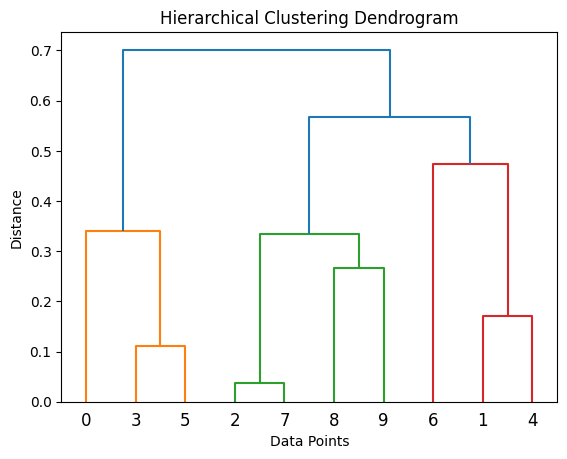

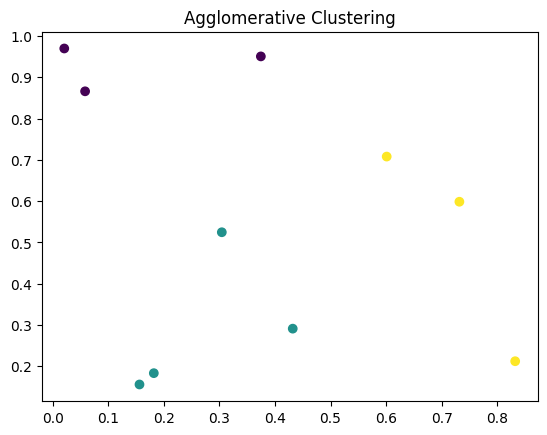

In [17]:
import time
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = np.random.rand(10, 2)

# Perform hierarchical clustering

tic= time.time()
linkage_matrix = linkage(X, method='average')  # You can change 'average' to other linkage methods
print("time spent", time.time()-tic)

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to get clusters
n_clusters = 3  # Specify the number of clusters
labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


(10, 10)
(9, 9)
(8, 8)
(7, 7)
(6, 6)
(5, 5)
(4, 4)
time spent 0.0031442642211914062


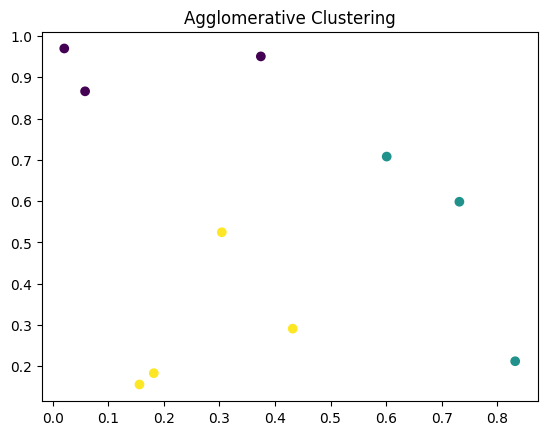

In [18]:
# Example usage:
import matplotlib.pyplot as plt
import time

# Generate sample data
np.random.seed(42)
X = np.random.rand(10, 2)

# Create an instance of AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage='average')

# Fit the model to the data
tic= time.time()
model.fit(X)
print("time spent", time.time()-tic)
# Get the cluster labels
labels = model.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()
